# Regresiones Lineales Simples

En este notebook, analizaremos la relación entre la altura y el peso de las personas. Contestaremos las siguientes preguntas:

- ¿Existe una relación entre peso y altura?
- En caso de existir, ¿será una relación lineal?
- ¿Se podrá predecir el peso de una persona a partir de su altura?
- ¿Cuán buena podría ser esa predicción?

Para esto, tomaremos el dataset SOCR Human Height/Weight. Más información en el siguiente link:
http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Link al dataset:
http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('SOCR-HeightWeight.csv', index_col=0)

In [12]:
df.columns = ['Height', 'Weight']

In [13]:
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


<Axes: xlabel='Height', ylabel='Weight'>

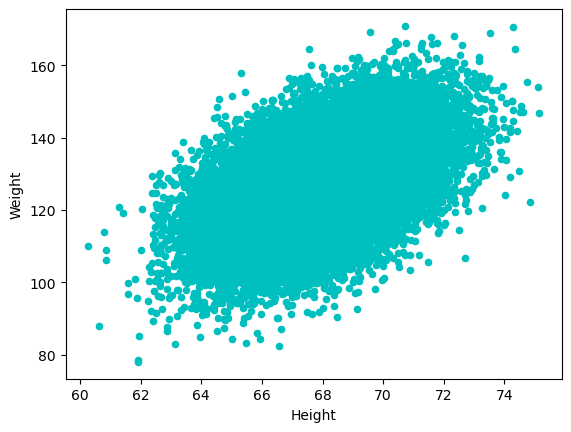

In [14]:
df.plot(kind='scatter', x='Height', y='Weight', c = 'c')

In [15]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


# Hipótesis de Trabajo

"El peso de un individuo depende de su altura, y tiene una relación lineal."

Formula escrita en notación que puedo buscar en internet:   \hat{y} = \hat{\alpha} + \hat{\beta} x 

In [17]:
import statsmodels.formula.api as smf

In [18]:
# OLS Ordinary Least Squares (método de los mínimos cuadrados)
# Weight es la variable dependiente (variable que quiero predecir) y height la variable independiente (predictor)
lm = smf.ols(data=df, formula="Weight ~ Height").fit()

In [27]:
lm.params

Intercept   -82.575743
Height        3.083476
dtype: float64

In [29]:
lm.params[0]

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_79371/4039256094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[0]


-82.57574306454089

In [31]:
lm.params[1]

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_79371/1630149547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[1]


3.0834764454029653

In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:12:47   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.5757      2.280    -36.214      0.000     -87.045     -78.106
Height         3.0835      0.034     91.981      0.000       3.018       3.149
==============================================================================
Omnibus:                        1.022   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.027
Skew:                          -0.016   Prob(JB):                        0.598
Kurtosis:                       2.996   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizando Predicciones

In [36]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['Height'])
x

,Height
0,60
1,65
2,70
3,75
4,80


In [38]:
# \hat{y} = -82.5757 + 3.0835 \x   eso se lee "valor esperado de y = intercepto + coeficiente * x"
lm.predict(x)

0    102.432844
1    117.850226
2    133.267608
3    148.684990
4    164.102373
dtype: float64

In [40]:
# Realizar las predicciones usando el modelo ajustado.
predicciones = lm.predict(x)

# Desplegar las predicciones formateadas.
for i, altura in enumerate(x['Height']):
    print(f"Para una altura de {altura}: el peso esperado es aproximadamente {predicciones.iloc[i]:.2f}.")

Para una altura de 60: el peso esperado es aproximadamente 102.43.
Para una altura de 65: el peso esperado es aproximadamente 117.85.
Para una altura de 70: el peso esperado es aproximadamente 133.27.
Para una altura de 75: el peso esperado es aproximadamente 148.68.
Para una altura de 80: el peso esperado es aproximadamente 164.10.


### Inspeccionando los resultados

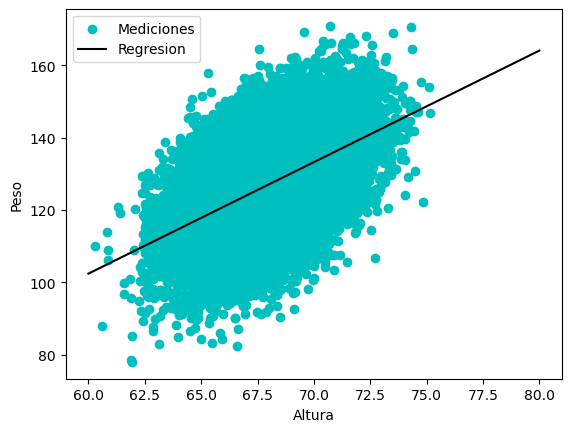

In [43]:
plt.scatter(df['Height'], df['Weight'], label='Mediciones', c = 'c')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(loc=0)

### Análisis de Residuales

In [47]:
y_pred = lm.predict(df['Height'])
y_true = df['Weight']

Index
1        120.265544
2        137.939722
3        131.413637
4        127.768536
5        126.446372
            ...    
24996    131.732499
24997    116.457296
24998    116.920712
24999    125.648893
25000    129.806745
Length: 25000, dtype: float64
Index
1        112.9925
2        136.4873
3        153.0269
4        142.3354
5        144.2971
           ...   
24996    118.0312
24997    120.1932
24998    118.2655
24999    132.2682
25000    124.8742
Name: Weight, Length: 25000, dtype: float64


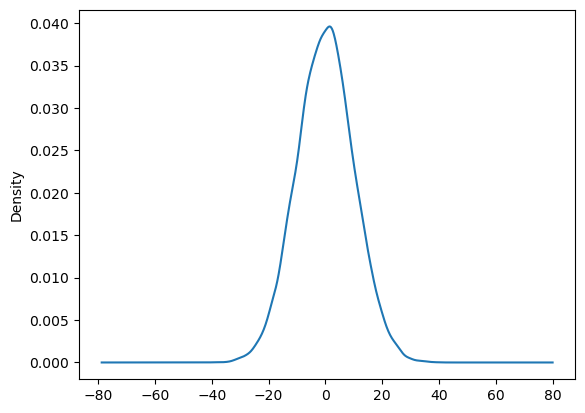

In [49]:
# Valor residual es: ŷ - y (\hat{y} - y )

(y_pred - y_true).plot(kind='kde')

print(y_pred)
print(y_true)

## Métricas de Evaluación del Modelo


In [148]:
import statsmodels.tools.eval_measures as metrics

In [150]:
# Mean Absolute Error (Error Absoluto Medio)
metrics.meanabs(y_true,y_pred)

8.037502348939364

In [152]:
# Mean Squared Error (Error cuadrático medio)
metrics.mse(y_true,y_pred)

101.58853248632849

In [91]:
# Root Medium Squared Error (Raíz cuadrada del MSE)
metrics.rmse(y_true,y_pred)

10.079113675632819

In [154]:
# r2 (R cuadrado, también llamado "coeficiente de determinación")
lm.rsquared

0.25286669174288057

1. Modelos de Regresión

•	OLS (Ordinary Least Squares):

smf.ols(formula="Y ~ X", data=df).fit()

Se usa para realizar regresiones lineales.

•	GLM (Generalized Linear Models):

smf.glm(formula="Y ~ X", data=df, family=sm.families.Gaussian()).fit()

Para realizar modelos lineales generalizados, permitiendo especificar diferentes distribuciones de respuesta.

•	WLS (Weighted Least Squares):

smf.wls(formula="Y ~ X", data=df, weights=weights).fit()

Utilizado para regresión donde se dan diferentes pesos a los datos.

•	Logit y Probit:

smf.logit(formula="binary_outcome ~ predictors", data=df).fit()

smf.probit(formula="binary_outcome ~ predictors", data=df).fit()

Para modelos de regresión logística y probit, respectivamente, a menudo utilizados para datos binarios.

2. Análisis de Varianza (ANOVA)

•	ANOVA de un factor:

smf.ols(formula="Y ~ C(X)", data=df).fit()

Puedes usar el resultado del modelo OLS para realizar ANOVA:

from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(result)

3. Modelado de Series Temporales

•	SARIMAX: Modelos de regresión con componentes autorregresivos y de media móvil, así como efectos estacionales.


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Y'], exog=df[['X1', 'X2']], order=(p,d,q), seasonal_order=(P,D,Q,s))

results = model.fit()

4. Modelos de Efectos Mixtos

•	MixedLM (Modelos Lineales Mixtos):


from statsmodels.regression.mixed_linear_model import MixedLM

model = MixedLM.from_formula("Y ~ X1 + X2", df, groups=df["group_variable"])

results = model.fit()

5. Modelos de Supervivencia

•	Cox Proportional Hazards:

from statsmodels.duration.hazard import PHReg

model = PHReg.from_formula("duration ~ X1 + X2", df)

results = model.fit()